In [19]:
import rasterio
from rasterio.plot import plotting_extent
import matplotlib.pyplot as plt
import numpy as np

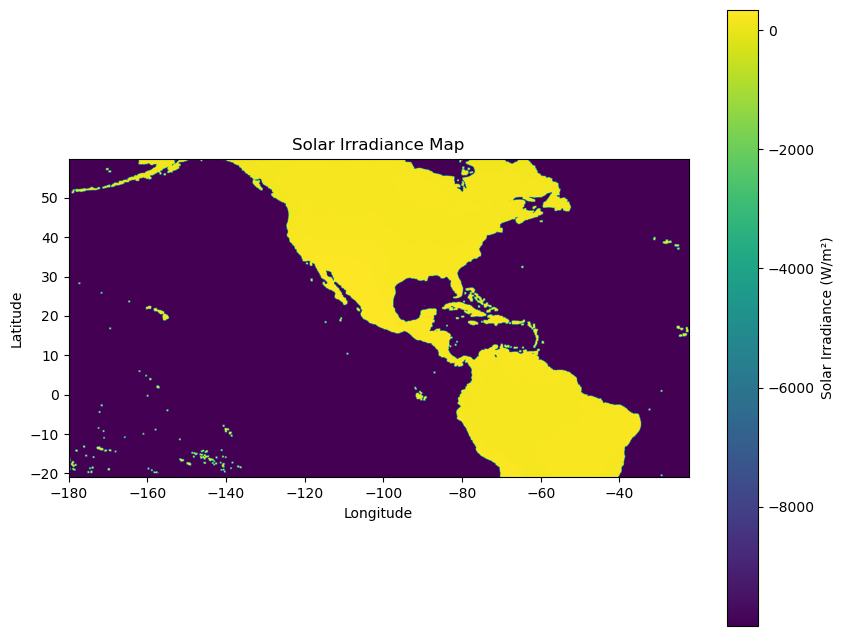

In [20]:
tif_file = 'Data/nrel/monthly-ghi/ghi_apr.tif'
with rasterio.open(tif_file) as dataset:
    data = dataset.read(1)  # Reads first band
    extent = plotting_extent(dataset)

plt.figure(figsize=(10, 8))
plt.imshow(data, extent=extent, cmap='viridis')
plt.colorbar(label='Solar Irradiance (W/m²)')
plt.title('Solar Irradiance Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [21]:
latitude = 44.0153
longitude = -73.1673

with rasterio.open(tif_file) as dataset:
    # Convert geographic coordinates (longitude, latitude) to raster coordinates
    row, col = dataset.index(longitude, latitude)
    
    # get the raster value at the raster coordinates
    irradiance_value = dataset.read(1)[row, col]

print(f'Irradiance at ({latitude}, {longitude}): {irradiance_value}')

Irradiance at (44.0153, -73.1673): 201.75807748538008


In [22]:
with rasterio.open(tif_file) as dataset:
    print("Dataset Info:")
    print("Width, Height:", dataset.width, dataset.height)
    print("Number of bands:", dataset.count)
    print("Resolution (deg/pixel):", dataset.res)

    data = dataset.read(1)

    print("\nData Stats (W/m²):")
    print("Min:", np.nanmin(data))
    print("Max:", np.nanmax(data))
    print("Mean:", np.nanmean(data))
    print("Standard deviation:", np.nanstd(data))

Dataset Info:
Width, Height: 3940 2025
Number of bands: 1
Resolution (deg/pixel): (0.04, 0.04)

Data Stats (W/m²):
Min: -9999.0
Max: 335.58863304093563
Mean: -7414.099550693264
Standard deviation: 4442.118732565058


### Dataset summary:
A grid (raster) of solar irradiance values, where each cell (~4 km x 4 km) contains an average irradiance value (in watts/m²). 